In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b56dd5c35ed84063abf4ce021c08119f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='eJBP90kYQS_JkIWlmfsxeVA4tOorESun5Mc6l8qfgHE4',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_b56dd5c35ed84063abf4ce021c08119f.get_object(Bucket='myfirstproject-donotdelete-pr-p6wuso8vskrcto',Key='UCI Bank Marketing Data Set  full data set.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body,encoding= 'unicode_escape')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.columns.to_list()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

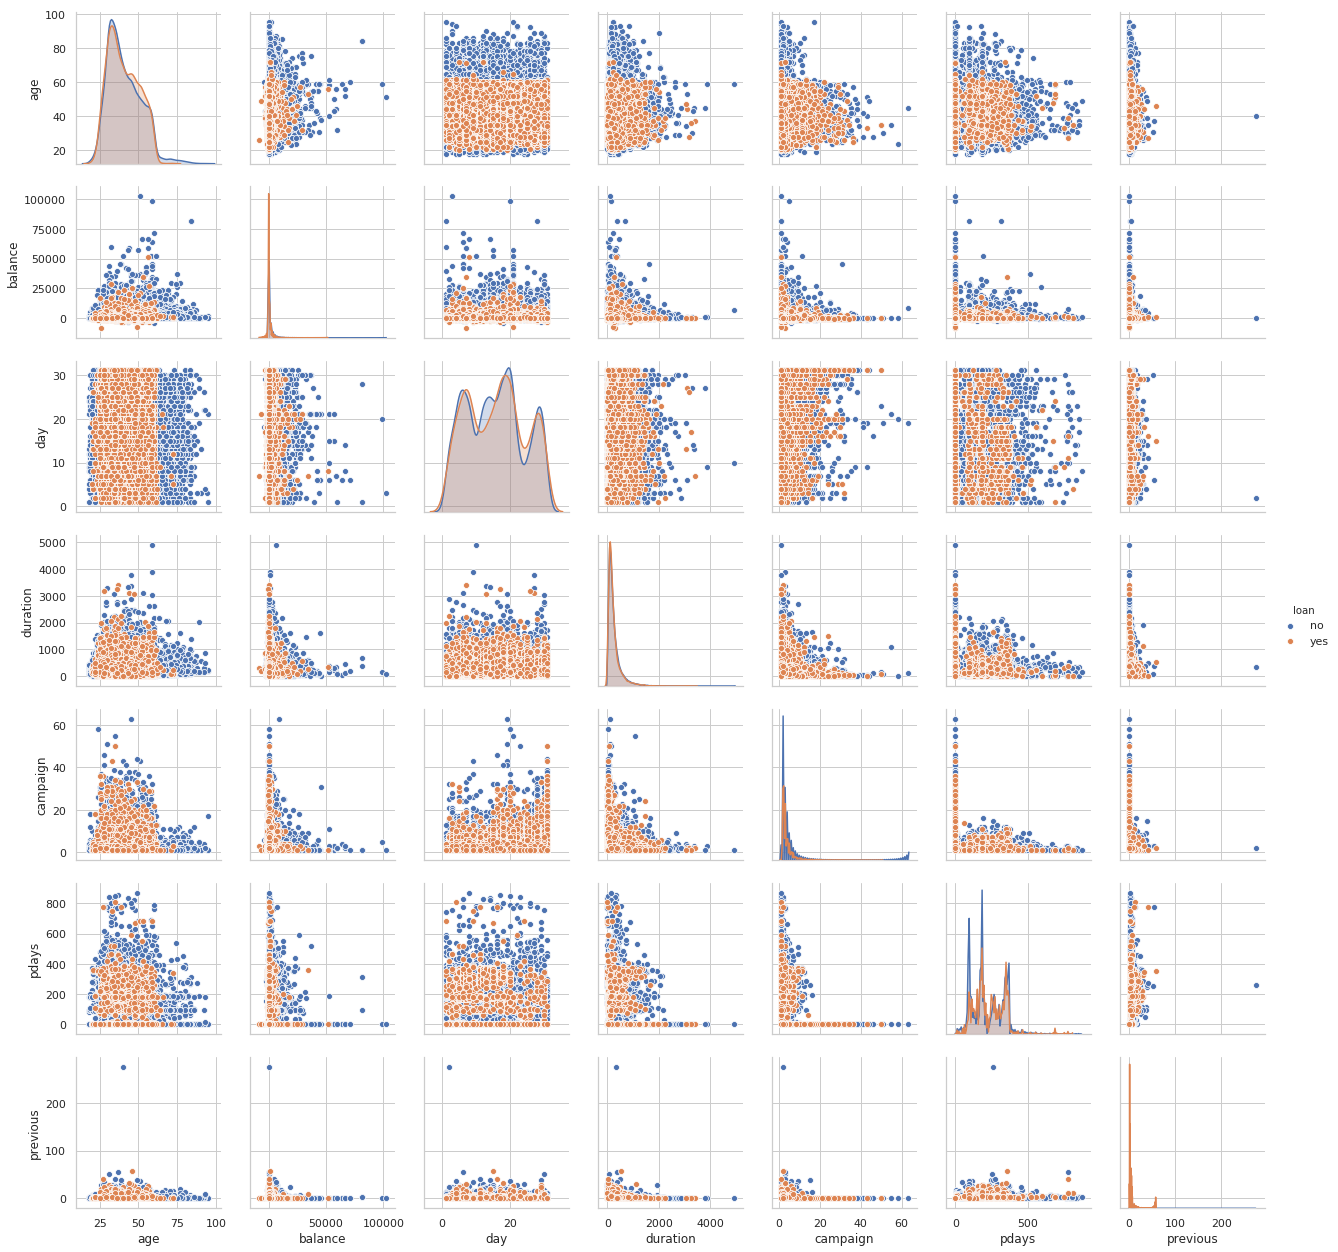

In [7]:
# Before everything letsee how the data looks like
sns.pairplot(df, hue='loan')

In [8]:
# let find the datadypes
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
# now let find how may categorical data we have
categorical = [i for i in df.columns if df[i].dtypes =='O']
print("The number of categorical data is :", len(categorical))
print('\n\n')

print('categorical: \n\n',categorical)

The number of categorical data is : 10



categorical: 

 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [10]:
# let see the categorical data
df[categorical].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [11]:
for i in categorical:
    print(df[i].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

## data exploraton

In [12]:
df['loan'].isnull().sum()

0

In [13]:
# let find the number of unique value
df.loan.nunique()

2

In [14]:
# let see what are those two
df.loan.unique()

array(['no', 'yes'], dtype=object)

In [15]:
# now let have a look at the distribution
df.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [16]:
# let find the percentage of each
percentage = df.loan.value_counts()/(len(df))*100
print('The percentage of yes and no is :', percentage)

The percentage of yes and no is : no     83.977351
yes    16.022649
Name: loan, dtype: float64


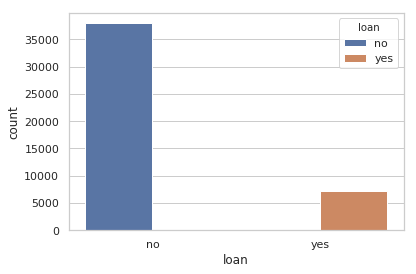

In [17]:
# vusialization of the loan destribution
sns.countplot(df['loan'],hue='loan',data =df)
plt.show()

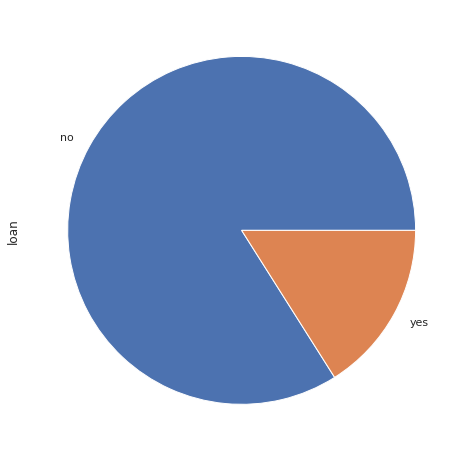

In [18]:
plt.figure(figsize = (10,8))
df['loan'].value_counts().plot(kind='pie')
plt.show()

In [19]:
# let explore the job columns
df['job'].head()

0      management
1      technician
2    entrepreneur
3     blue-collar
4         unknown
Name: job, dtype: object

In [20]:
# find the number of unique jobs
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [21]:
# Find the job which has the highest balance 
df[df['balance']==df['balance'].max()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no


In [22]:
# Find the job which has the lowest balance
df[df['balance']==df['balance'].min()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12909,26,blue-collar,single,secondary,yes,-8019,no,yes,cellular,7,jul,299,3,-1,0,unknown,no


In [23]:
# find the job with the mximum number of employees
df['job'].value_counts().max()

9732

In [24]:
# the one which has minimum number of employees
df.job.value_counts().min()

288

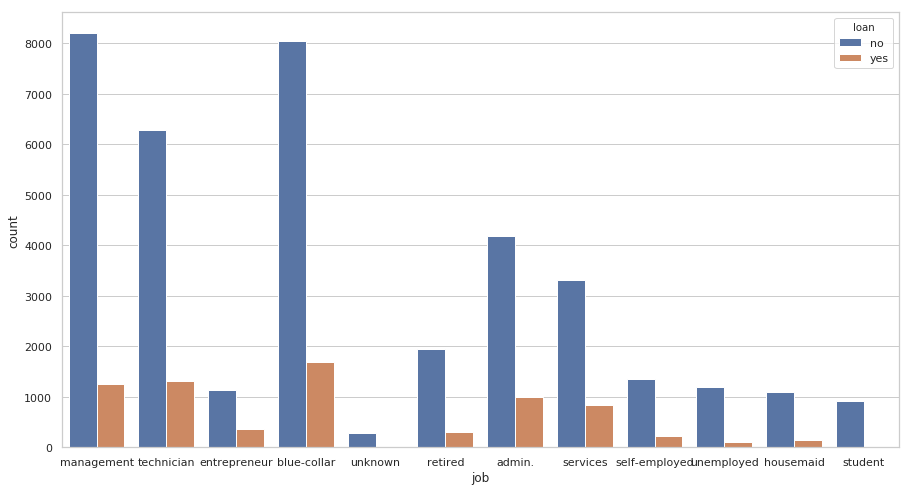

In [25]:
#visualzation of the job
plt.figure(figsize=(15,8))
sns.countplot(df.job,hue = 'loan',data= df)

In [26]:
# distribution of the material 
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [27]:
# let check the number of unique labels
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

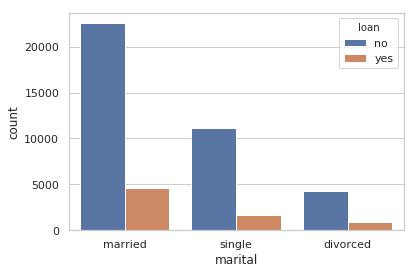

In [28]:
#visualization of the destribution
sns.countplot(df.marital,hue='loan',data = df)

In [29]:
# Number of unique labels
df.default.nunique()

2

In [30]:
# View of frequency distribution of the default column values
df.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

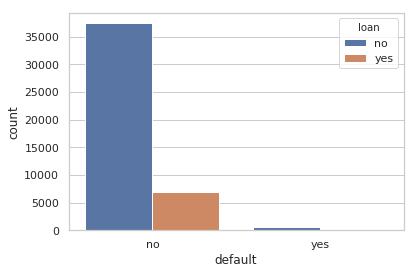

In [31]:
# Vusialization of the default column
sns.countplot(df.default, hue= 'loan',data = df)
plt.show()

In [32]:
# Check number of uinque labels of balance column
df.balance.unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353])

In [33]:
# check the number of unique labels
df.balance.value_counts()

 0        3514
 1         195
 2         156
 4         139
 3         134
 5         113
 6          88
 8          81
 23         75
 10         69
 7          69
 11         65
 25         63
 20         62
 19         60
 15         59
 47         59
 21         59
 49         59
 33         58
 13         57
 53         56
 16         56
 24         55
 79         55
 91         54
 145        54
 46         54
 9          54
 14         53
          ... 
 6205        1
 6320        1
 4394        1
 2327        1
 4404        1
 8460        1
 29312       1
 4362        1
-2049        1
 17332       1
 2633        1
 6571        1
 1338        1
-568         1
 8402        1
 8863        1
 10451       1
 29184       1
 13242       1
 4586        1
 51439       1
 4092        1
-472         1
 8652        1
 4554        1
 4305        1
 6352        1
 18881       1
 14889       1
 7218        1
Name: balance, Length: 7168, dtype: int64

In [34]:
# Check number of label
df['education'].nunique()

4

In [35]:
#check number of frequency distrubition values
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

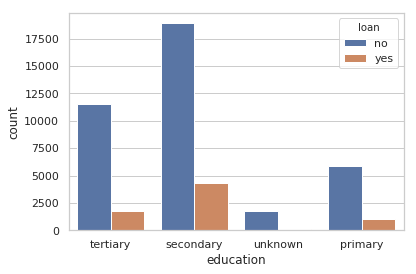

In [36]:
#vusialization of the distribution
sns.countplot(df.education,hue='loan',data = df)

In [37]:
# check the number of unique labels
df.housing.nunique()

2

In [38]:
# view of the frequency distribution of values
df.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

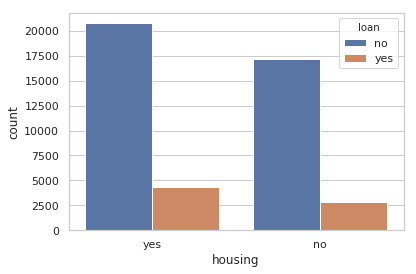

In [39]:
#visualization of the frequency distrubition of housing
sns.countplot(df['housing'],hue='loan',data = df)
plt.show()

In [40]:
# Check the number of unique labels
print('The number of unique labels is:',
df.contact.nunique())

The number of unique labels is: 3


In [41]:
# View of the frequency distribution of the contact variable
df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

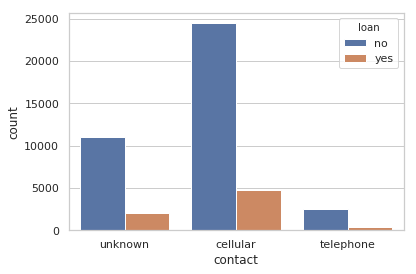

In [42]:
# Visualization of the frequency distribution of contact variable
sns.countplot(df.contact,hue='loan',data = df)

In [43]:
# check the number of unique labels of day variable
df.day.nunique()

31

In [44]:
# View of the frequency distribution of day
df.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

Text(0.5, 1.0, 'Day distribution')

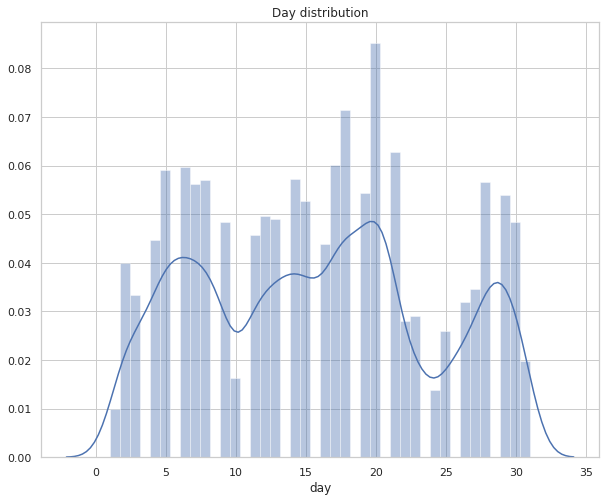

In [45]:
plt.figure(figsize =(10,8))
sns.distplot(df.day)
plt.title('Day distribution')

In [46]:
df['month'] = df['month'].str.capitalize()

In [47]:

#df = df.sort_values(by="month")

In [48]:
# Check the number unique of labels
df.month.nunique()

12

In [49]:
# View of the frequency distribution of month variable
df.month.value_counts()

May    13766
Jul     6895
Aug     6247
Jun     5341
Nov     3970
Apr     2932
Feb     2649
Jan     1403
Oct      738
Sep      579
Mar      477
Dec      214
Name: month, dtype: int64

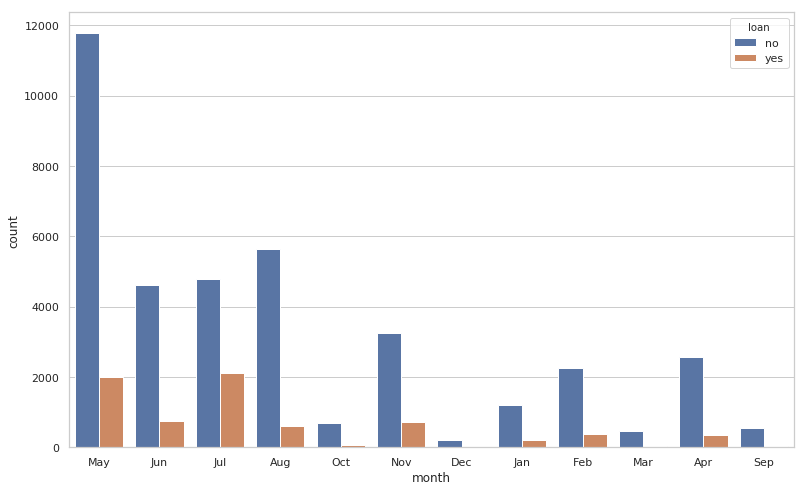

In [50]:
# Vvisualization of the frequency distribution
plt.figure(figsize = (13,8))
sns.countplot(df.month, hue = 'loan', data = df)

In [51]:
# check the number of unique labels of duration
df.duration.nunique()

1573

In [52]:
# Find which job has the maximum duration time
df[df['duration']==df['duration'].max()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24148,59,technician,married,tertiary,no,6573,yes,no,telephone,10,Nov,4918,1,-1,0,unknown,no


In [53]:
# View of frequency distribution of duration variable
df.duration.value_counts()

124     188
90      184
89      177
122     175
104     175
114     175
136     174
112     174
139     174
121     173
91      170
119     170
88      170
103     169
92      168
123     168
97      168
111     166
73      166
85      166
113     166
81      166
125     165
82      165
108     165
106     165
80      164
87      163
101     163
126     163
       ... 
1255      1
3366      1
1319      1
1298      1
1650      1
2485      1
947       1
2453      1
2389      1
1971      1
1875      1
1491      1
1395      1
1331      1
934       1
1107      1
1158      1
1254      1
1778      1
1286      1
1318      1
1478      1
1606      1
1702      1
2770      1
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64

In [54]:
# find the one which avarage duration time
df[df['duration']==df['duration'].mean()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [55]:
# find the job with the lowest duration of loan
df[df['duration']==df['duration'].min()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6424,53,management,married,primary,no,351,yes,no,unknown,27,May,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,Aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,May,0,2,-1,0,unknown,no


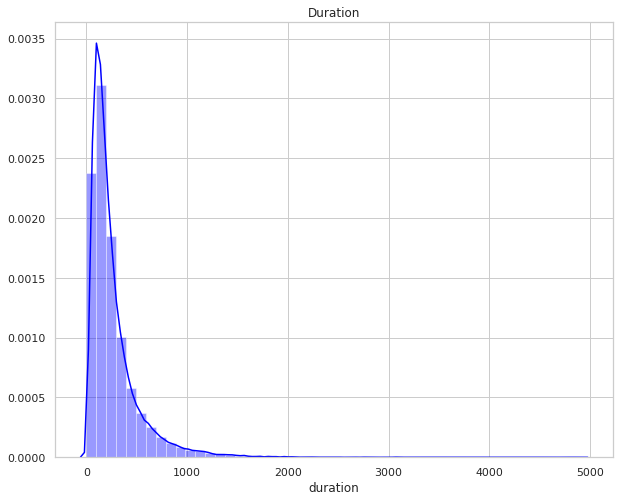

In [56]:
# view of the distribution of duration of loan
plt.figure(figsize=(10,8))
sns.distplot(df.duration,color='blue')
plt.title('Duration')
plt.show()

In [57]:
# check the number of unique labels on 
df.campaign.nunique()

48

In [58]:
# View of the frequency distribution of campaign variable
df.campaign.value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

In [59]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 189       60
 186       60
 174       57
 96        57
 349       57
 363       55
 97        54
 90        54
 196       51
 365       51
 368       49
 342       49
 98        49
        ...  
 774        1
 550        1
 396        1
 492        1
 466        1
 45         1
 434        1
 18         1
 529        1
 465        1
 401        1
 784        1
 656        1
 592        1
 528        1
 464        1
 432        1
 655        1
 495        1
 543        1
 47         1
 782        1
 686        1
 558        1
 526        1
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [60]:
df.groupby(['previous','y']).mean()

age      balance        day     duration  campaign  \
previous y                                                               
0        no   40.903307  1280.229014  16.220197   222.165326  2.980637   
         yes  41.221336  1701.310579  15.403664   610.496749  2.339835   
1        no   40.213339  1401.941069  14.227501   216.846048  1.895843   
         yes  41.689537  1945.346484  15.072041   405.998285  1.627787   
2        no   40.398788  1402.416970  14.090303   213.250303  1.950303   
         yes  42.335526  2031.660088  14.769737   408.035088  1.760965   
3        no   41.291274  1479.667453  14.344340   226.300708  2.187500   
         yes  43.625850  2156.278912  14.557823   414.384354  1.731293   
4        no   39.948435  1651.333333  14.051565   220.672192  2.316759   
         yes  42.444444  1723.005848  14.713450   425.614035  1.953216   
5        no   41.177515  1334.304734  14.210059   210.446746  2.559172   
         yes  42.479339  2051.876033  13.743802   375.917355  1.942149   
6        no   41.195876  1190.350515  14.190722   220.340206  2.443299   
         yes  41.469880  1863.457831  14.265060   394.421687  2.048193   
7        no   41.735099  1488.086093  14.284768   205.132450  2.695364   
         yes  44.037037  2431.481481  13.537037   430.666667  1.981481   
8        no   39.677778  1091.288889  14.511111   227.666667  2.322222   
         yes  45.384615  1357.410256  14.128205   386.897436  1.897436   
9        no   40.029412  1482.764706  13.397059   200.602941  3.338235   
         yes  45.416667  2388.083333  15.416667   357.291667  1.916667   
10       no   40.414634  1565.292683  13.463415   242.853659  2.512195   
         yes  40.653846  1577.000000  16.653846   376.230769  2.192308   
11       no   42.000000  1289.440000  12.140000   209.320000  3.660000   
         yes  46.266667  2196.400000  18.866667   450.733333  2.266667   
12       no   42.147059  1629.852941  12.705882   198.088235  2.588235   
         yes  45.500000  1989.600000  15.000000   347.200000  2.800000   
13       no   39.172414  1801.931034  13.827586   158.413793  3.793103   
         yes  47.000000  2774.111111  18.111111   388.222222  1.888889   
14       no   37.357143  1132.928571  13.500000   172.928571  3.857143   
         yes  38.800000  1172.000000  10.200000   293.400000  1.600000   
...                 ...          ...        ...          ...       ...   
19       no   42.444444  1929.333333  14.333333   153.222222  2.777778   
         yes  34.000000   947.000000  16.000000   331.000000  2.000000   
20       no   35.714286   147.285714  11.142857   199.142857  2.142857   
         yes  77.000000  2590.000000  12.000000   345.000000  1.000000   
21       no   40.000000  2219.000000  17.000000   174.333333  3.333333   
         yes  28.000000  4987.000000   2.000000   924.000000  2.000000   
22       no   36.600000   419.800000  12.800000   111.000000  2.600000   
         yes  37.000000   912.000000  12.000000   637.000000  3.000000   
23       no   41.000000  3228.000000  10.714286   172.428571  2.714286   
         yes  34.000000   275.000000   2.000000   196.000000  2.000000   
24       no   39.200000   995.800000  15.600000   269.000000  4.200000   
25       no   37.000000  1471.000000  19.000000   135.250000  3.250000   
26       no   39.000000   155.000000  20.000000    20.000000  6.000000   
         yes  27.000000  6791.000000   5.000000   179.000000  2.000000   
27       no   37.200000   885.000000  15.000000   216.600000  3.600000   
28       no   35.000000  3752.500000  20.000000    95.000000  4.000000   
29       no   39.666667  2946.666667  18.333333   133.000000  5.666667   
         yes  26.000000   725.000000   5.000000  1916.000000  2.000000   
30       no   33.000000  3629.000000  18.000000    71.500000  5.000000   
         yes  45.000000   608.000000   7.000000  1135.000000  3.000000   
32       no   44.000000   429.000000  18.000000    35.000000  3.000000   
35       no   28.000000 

In [61]:
# Check the number of unique labels of poutcome variable
df.poutcome.nunique()

4

In [62]:
# Vew of the frequency distribution of poutcome variable
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

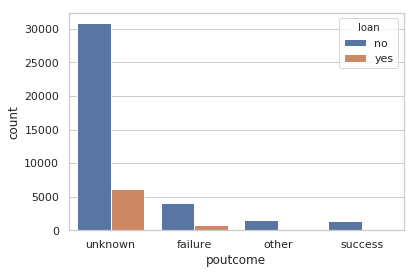

In [63]:
# Visualization of the frequency distribution of poutcome variable
sns.countplot(df.poutcome, hue='loan', data = df)
plt.show()

In [64]:
# which job has the highest balance
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,May,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,May,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,May,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,May,198,1,-1,0,unknown,no


In [65]:
df.groupby('job')['balance'].max()

job
admin.            64343
blue-collar       66653
entrepreneur      59649
housemaid         45141
management       102127
retired           81204
self-employed     52587
services          57435
student           24025
technician        45248
unemployed        44134
unknown           19706
Name: balance, dtype: int64

## Now let prepare our data for machine learning

In [66]:
# now let change some categorical data and drop some but first let see all categorical data
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [67]:
# Dropping certain columns
df.drop(['job','marital','default','y','month','poutcome','education'],axis=1, inplace=True)

In [68]:
df.head()

,age,balance,housing,loan,contact,day,duration,campaign,pdays,previous
0,58,2143,yes,no,unknown,5,261,1,-1,0
1,44,29,yes,no,unknown,5,151,1,-1,0
2,33,2,yes,yes,unknown,5,76,1,-1,0
3,47,1506,yes,no,unknown,5,92,1,-1,0
4,33,1,no,no,unknown,5,198,1,-1,0


In [69]:
# let process for housing
df['housing'] = pd.get_dummies(df['housing'])

In [70]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [71]:
contact_map = {'telephone':1,'cellular':2,'unknown':3}
df['contact'] = df['contact'].map(contact_map)

In [72]:
df.isnull().sum()

age         0
balance     0
housing     0
loan        0
contact     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [73]:
# Selection of features
X = df.drop('loan',axis=1)
y= df['loan']

In [74]:
X.head()

,age,balance,housing,contact,day,duration,campaign,pdays,previous
0,58,2143,0,3,5,261,1,-1,0
1,44,29,0,3,5,151,1,-1,0
2,33,2,0,3,5,76,1,-1,0
3,47,1506,0,3,5,92,1,-1,0
4,33,1,1,3,5,198,1,-1,0


In [75]:
y.head()

0     no
1     no
2    yes
3     no
4     no
Name: loan, dtype: object

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state=0)

In [78]:
X_train.shape

(31647, 9)

In [79]:
X_test.shape

(13564, 9)

# 1-logistic regression algorithm

In [80]:
logreg = LogisticRegression()

In [81]:
# Training the model
logreg.fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [82]:
# TIME TO TEST THE MODEL USING THE TEST DATA
y_pred = logreg.predict(X_test)

In [83]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

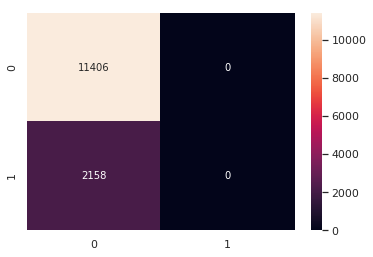

In [84]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [85]:
# AS WE CAN SEE FROM THE CONFUSION MATRIX THE ACCURACY IS HIGH BECAUSE THE NUMBERS WE GET ARE VERY BIG 84%

In [86]:
print(classification_report(y_test, y_pred))


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          no       0.84      1.00      0.91     11406
         yes       0.00      0.00      0.00      2158

   micro avg       0.84      0.84      0.84     13564
   macro avg       0.42      0.50      0.46     13564
weighted avg       0.71      0.84      0.77     13564



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [87]:
logreg.intercept_

array([-0.54372423])

In [88]:
logreg.coef_

array([[-3.29321964e-03, -1.81726107e-04, -2.15407439e-01,
        -2.88206893e-01,  1.63771446e-03, -1.79512327e-04,
         1.21270521e-03, -9.57466620e-04, -1.34312604e-03]])

In [89]:
# let see the accuracy
from sklearn.metrics import accuracy_score

In [90]:
score =accuracy_score(y_test,y_pred)
print("The accuracy score is :",score)

The accuracy score is : 0.8409023886759068


We can still improve the model 

# RandomForestClassifier algorithm

In [91]:
rfc = RandomForestClassifier(random_state =0)

In [92]:
rfc.fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [93]:
y_pred = rfc.predict(X_test)
y_pred

array(['yes', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [94]:
# Check accuracy score

print('Model accuracy score with 9 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 9 decision-trees : 0.8345


## Decision Tree Classifier algorithm

In [95]:
classifier = DecisionTreeClassifier()

In [96]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [97]:
y_pred = classifier.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [98]:
print("The accuracy score is :",accuracy_score(y_test,y_pred))

The accuracy score is : 0.7382040695959894


In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.85      0.83      0.84     11406
         yes       0.21      0.23      0.22      2158

   micro avg       0.74      0.74      0.74     13564
   macro avg       0.53      0.53      0.53     13564
weighted avg       0.75      0.74      0.74     13564



### Prepared by: Abdoulaye balde
if you would like to use Data Science to enhance your business, let's connect and learn together!
mail:abdoulayegnbalde@gmail.com
